<a href="https://colab.research.google.com/github/preethi07052004/PRODIGY_DS_02/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train.csv')


In [ ]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
print(data.head())
print(data.info())
print(data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing 'Age' with median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common embarkation point
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column as it has too many missing values
data.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Convert 'Sex' to numerical values: male=0, female=1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
print(data['Sex'])

# Convert 'Embarked' to numerical values
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print()
print(data['Embarked'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [ ]:
# Create a new feature 'FamilySize' as the sum of 'SibSp' and 'Parch' + 1 (the person itself)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Create a new feature 'IsAlone' (1 if alone, 0 if with family)
data['IsAlone'] = 1  # Initialize to 1
data['IsAlone'].loc[data['FamilySize'] > 1] = 0


<ipython-input-8-6cf2387dca84>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsAlone'].loc[data['FamilySize'] > 1] = 0


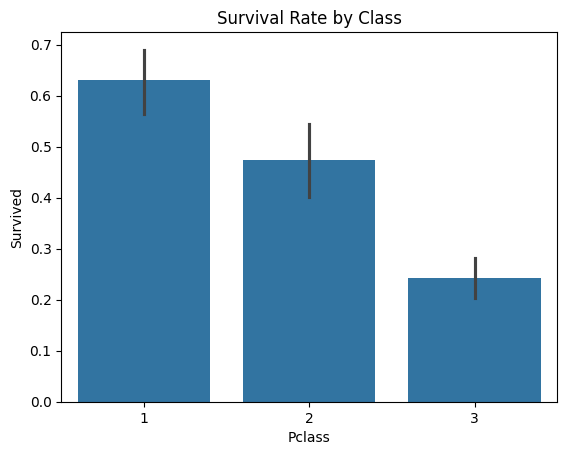

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()


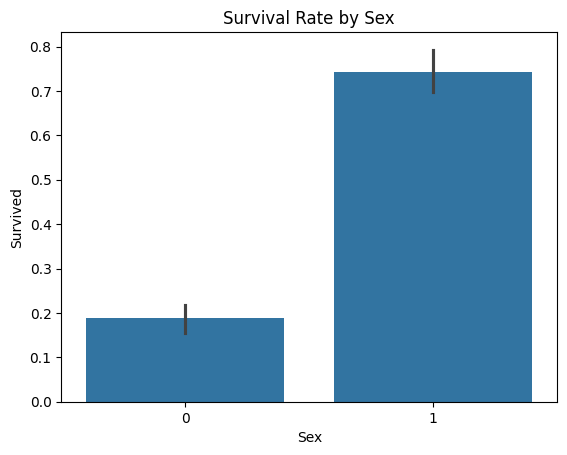

In [ ]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()


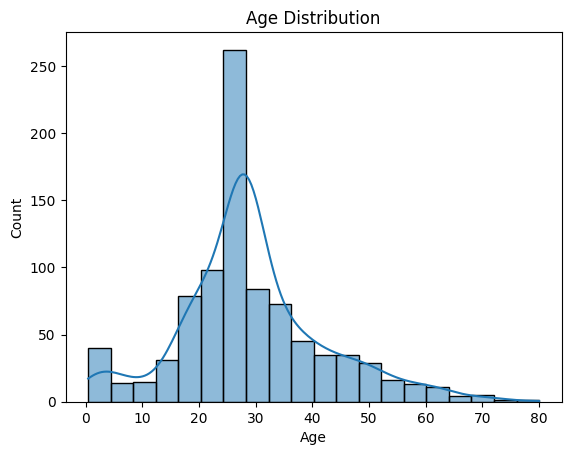

In [ ]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


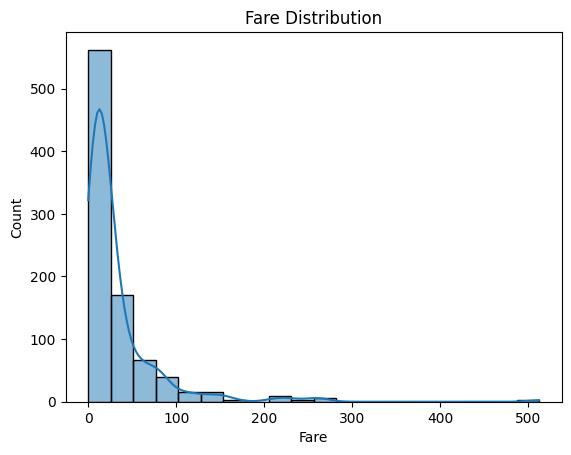

In [ ]:
sns.histplot(data['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()


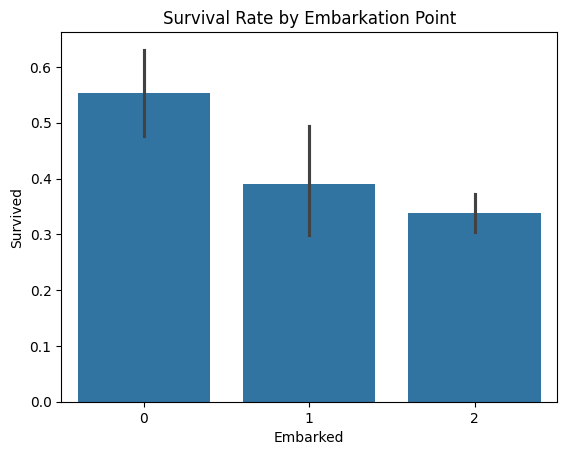

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarkation Point')
plt.show()


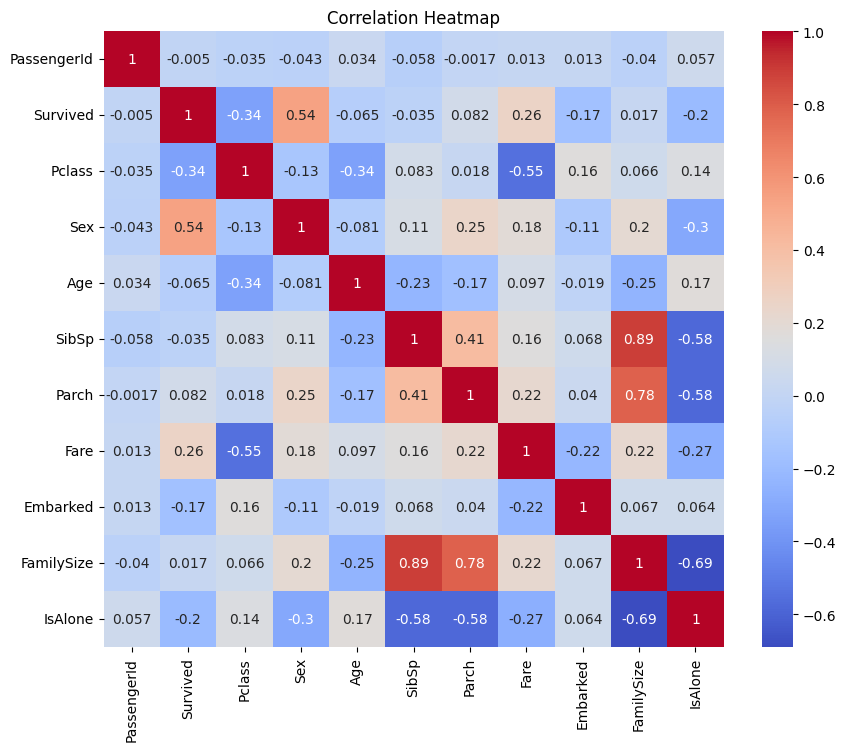

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()